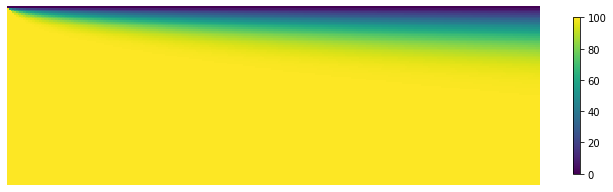

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, pi, exp
from matplotlib import animation
from IPython.display import HTML

# Chaleur 1

def tableau(L1, L2, T1, T2, N, P, C):
    T = np.zeros((N + 1, P + 1))
    lim = 1 + int(N * L1 / (L1 + L2))
    for n in range(0, lim):
        T[n, 0] = T1
    for n in range(lim, N + 1):
        T[n, 0] = T2
    for i in range(1, P + 1):
        T[0, i] = T1
        T[N, i] = T2
    for i in range(0, P):
        for n in range(1, N):
            T[n, i + 1] = T[n, i] + C * (T[n + 1, i] - 2 * T[n, i] + T[n - 1, i])
    return T


L1, L2, T1, T2, N, P, C = 1, 100, 0, 100, 100, 300, 0.5

T = tableau(L1, L2, T1, T2, N, P, C)

plt.matshow(T)
plt.colorbar(shrink=0.7)
plt.axis('off')
plt.show()

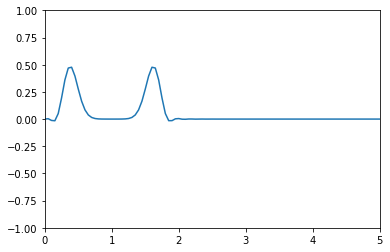

In [7]:
# Cordes vibrantes

def tableau(L, f, N, P, C):
    U = np.zeros((N + 1, P + 1))
    h = L / N
    for n in range(1, N):
        U[n, 0] = f(n * h)
    for n in range(1, N):
        U[n, 1] = U[n, 0] + C**2 / 2 * (U[n + 1, 0] - 2 * U[n, 0] + U[n - 1, 0])
    for i in range(1, P):
        for n in range(1, N):
            U[n, i + 1] = 2 * U[n, i] - U[n, i - 1] + C**2 * (U[n + 1, i] - 2 * U[n, i] + U[n - 1, i])
    return U


L, fuseaux = 5, 5


def f(x):
    # return sin(fuseaux*pi*x/L)
    return exp(-50 * (x - 1)**2)

#fen�tre et nb de points
uMin, uMax = -1, 1
N, P, C = 100, 200, 0.95

U = tableau(L, f, N, P, C)

x = np.linspace(0, L, N + 1)

fig = plt.figure()


def animate(i):
    plt.clf()
    plt.axis([0, L, uMin, uMax])
    plt.plot(x, U[:, i])


anim = animation.FuncAnimation(fig, animate, repeat=False, frames=P - 1, interval=10)

HTML(anim.to_jshtml())

In [ ]:
# Chaleur 2

def norme(M):
    return np.max(np.abs(M))

Tg, Th, Td, Tb = 100, 0, 100, 0
N = 100
eps = 0.01
maxIter = 10000
om = 2 / (1 + sin(pi / N))
om1 = 1 - om

nbIter = 0
Tinit = 50
T = Tinit * np.ones((N + 1, N + 1))
T[0] = Th * np.ones(N + 1)
T[N] = Tb * np.ones(N + 1)
T[:, 0] = Tg * np.ones(N + 1)
T[:, N] = Td * np.ones(N + 1)

ecart = eps + 1

while nbIter < maxIter and ecart > eps:
    Tprec = T.copy()
    for i in range(1, N):
        for j in range(1, N):
            T[i, j] = om1 * T[i, j] + om * 0.25 * (T[i - 1, j] + T[i, j - 1] + Tprec[i + 1, j] + Tprec[i, j + 1])
            # T[i, j] = 0.25*(T[i-1, j] + T[i, j-1] + Tprec[i+1, j] + Tprec[i, j+1])
    nbIter += 1
    ecart = norme(T - Tprec)

###############################################################################
# simple �tat final

print(nbIter)
plt.matshow(T)
plt.colorbar(shrink=0.7)
plt.axis('off')
plt.show()